In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130,322.0,0.0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115,564.0,0.0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124,261.0,0.0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,NaN,4.0,128,NaN,0.0,0,105.0,NaN,NaN,NaN,NaN,7.0
4,0.0,74.0,2.0,120,269.0,0.0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172,199.0,1.0,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120,263.0,0.0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140,294.0,0.0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140,192.0,0.0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	22
float64		column 2	36
float64		column 3	28
int64		column 4	0
float64		column 5	21
float64		column 6	7
int64		column 7	0
float64		column 8	14
float64		column 9	43
float64		column 10	42
float64		column 11	50
float64		column 12	29
float64		column 13	50


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,248.000000,234.000000,242.000000,270.000000,249.000000,263.000000,270.000000,256.000000,227.000000,228.000000,220.000000,241.000000,220.000000
mean,0.681452,54.068376,3.165289,131.344444,250.136546,0.148289,1.022222,149.238281,0.312775,1.051316,1.600000,0.663900,4.654545
std,0.466856,8.918541,0.949751,17.861608,52.117398,0.356064,0.997891,23.261722,0.464648,1.160718,0.622266,0.952575,1.932355
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.250000,3.000000,120.000000,213.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,54.000000,3.000000,130.000000,245.000000,0.000000,2.000000,152.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,60.000000,4.000000,140.000000,282.000000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,76.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

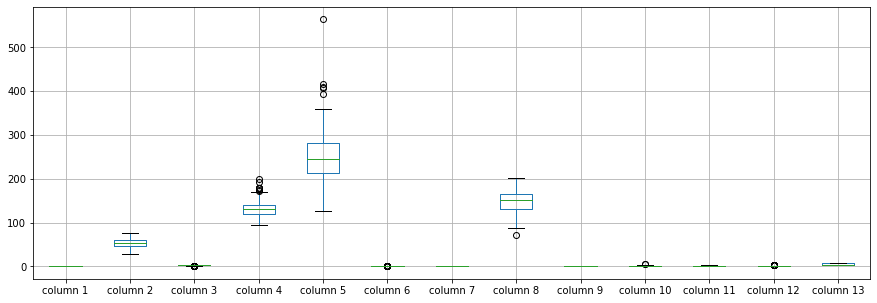

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.681452
column 2      54.068376
column 3       3.165289
column 4     131.344444
column 5     250.136546
column 6       0.148289
column 7       1.022222
column 8     149.238281
column 9       0.312775
column 10      1.051316
column 11      1.600000
column 12      0.663900
column 13      4.654545
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.120046,0.054200,-0.053587,-0.236955,0.095481,0.048986,-0.071843,0.197737,0.127470,0.074198,0.066015,0.403967
column 2,-0.120046,1.000000,0.078196,0.320158,0.241250,0.145560,0.151803,-0.405265,0.064955,0.211568,0.178891,0.332436,0.085974
column 3,0.054200,0.078196,1.000000,-0.088925,0.077448,-0.085156,0.083786,-0.315818,0.375748,0.174277,0.158497,0.223522,0.267818
column 4,-0.053587,0.320158,-0.088925,1.000000,0.163283,0.138634,0.116157,-0.037712,0.059918,0.219749,0.181609,0.079998,0.130393
column 5,-0.236955,0.241250,0.077448,0.163283,1.000000,0.014843,0.168279,-0.013934,0.065617,0.003581,0.005858,0.115081,0.010962
column 6,0.095481,0.145560,-0.085156,0.138634,0.014843,1.000000,0.068686,0.007065,0.001391,-0.054695,0.045108,0.083531,-0.010564
column 7,0.048986,0.151803,0.083786,0.116157,0.168279,0.068686,1.000000,-0.071845,0.088179,0.154671,0.211443,0.105381,0.029359
column 8,-0.071843,-0.405265,-0.315818,-0.037712,-0.013934,0.007065,-0.071845,1.000000,-0.370437,-0.326168,-0.354991,-0.243585,-0.233195
column 9,0.197737,0.064955,0.375748,0.059918,0.065617,0.001391,0.088179,-0.370437,1.000000,0.240912,0.260877,0.109346,0.319332
column 10,0.127470,0.211568,0.174277,0.219749,0.003581,-0.054695,0.154671,-0.326168,0.240912,1.000000,0.616193,0.273263,0.331284


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+108,13+108+108,13+108+108+108,13+108+108+108+108,13+108+108+108+108+108,13+108+108+108+108,13+108+108+108,13+108+108,13+108,13], vae_layer = False, seed = 108)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 573.8999176025391
Epoch: 1 , loss: 572.9616470336914
Epoch: 2 , loss: 571.6337051391602
Epoch: 3 , loss: 570.6104850769043
Epoch: 4 , loss: 569.0319976806641
Epoch: 5 , loss: 573.7803955078125
Epoch: 6 , loss: 573.7614212036133
Epoch: 7 , loss: 572.4562034606934
Epoch: 8 , loss: 570.942512512207
Epoch: 9 , loss: 568.7733268737793
Epoch: 10 , loss: 567.459285736084
Epoch: 11 , loss: 568.7701473236084
Epoch: 12 , loss: 566.0711517333984
Epoch: 13 , loss: 565.6617012023926
Epoch: 14 , loss: 563.8042125701904
Epoch: 15 , loss: 561.2462997436523
Epoch: 16 , loss: 562.771167755127
Epoch: 17 , loss: 563.3511352539062
Epoch: 18 , loss: 562.1342887878418
Epoch: 19 , loss: 556.3807563781738
Epoch: 20 , loss: 551.6716976165771
Epoch: 21 , loss: 541.4940319061279
Epoch: 22 , loss: 505.6076011657715
Epoch: 23 , loss: 479.58218002319336
Epoch: 24 , loss: 455.2941646575928
Epoch: 25 , loss: 432.5023593902588
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,-19.860794,0.0,0,-95.747147,0.0,0,0.0,-0.933992,0.451611,-0.775394,-1.077917,0.0
4,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
266,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
267,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
268,0.0,0.000000,0.0,0,0.000000,0.0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(698.3285041275059, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.12896776316486566

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     105.595306
column 6       0.000000
column 7       2.000000
column 8      69.902641
column 9       0.082236
column 10      0.000000
column 11      1.109867
column 12      0.128750
column 13      3.408039
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.000000,4.0,130,322.000000,0.0,2,109.0,0.000000,2.400000,2.000000,3.000000,3.0
1,0.0,67.000000,3.0,115,564.000000,0.0,2,160.0,0.000000,1.600000,2.000000,0.000000,7.0
2,1.0,57.000000,2.0,124,261.000000,0.0,0,141.0,0.000000,0.300000,1.000000,0.000000,7.0
3,1.0,44.139206,4.0,128,167.252853,0.0,0,105.0,0.066008,0.651611,1.224606,-0.077917,7.0
4,0.0,74.000000,2.0,120,269.000000,0.0,2,121.0,1.000000,0.200000,1.000000,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,3.0,172,199.000000,1.0,0,162.0,0.000000,0.500000,1.000000,0.000000,7.0
266,1.0,44.000000,2.0,120,263.000000,0.0,0,173.0,0.000000,0.000000,1.000000,0.000000,7.0
267,0.0,56.000000,2.0,140,294.000000,0.0,2,153.0,0.000000,1.300000,2.000000,0.000000,3.0
268,1.0,57.000000,4.0,140,192.000000,0.0,0,148.0,0.000000,0.400000,2.000000,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_AL_10(imp).xlsx", index=False, header=False)